In [126]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, classification_report
# Library used for data preprocessing
from sklearn.preprocessing import LabelEncoder

In [127]:
data = pd.read_csv("Iris.csv")

In [128]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Chart - : Sepal Length vs Sepal Width

In [129]:
# Define colors for each species and the corresponding species labels.
colors = ['red', 'yellow', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']


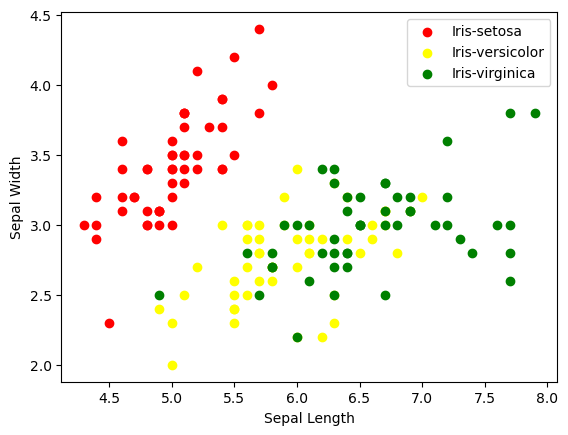

In [130]:
# Create a scatter plot for Sepal Length vs Sepal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

## Chart: Petal Length vs Petal Width

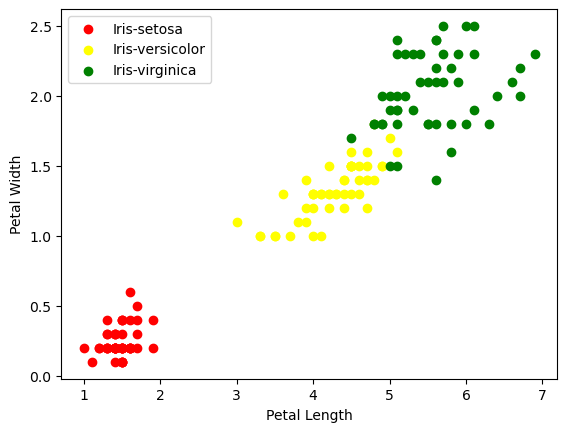

In [131]:
# Create a scatter plot for Petal Length vs Petal Width for each species.
for i in range(3):
    # Select data for the current species.
    x = data[data['Species'] == species[i]]

    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

### remove iris versiColor to ues binary classfication

In [132]:
dataRemoveVersiColor = data[data['Species'] != 'Iris-versicolor' ]
dataRemoveVersiColor.head()
species = ['Iris-setosa', 'Iris-virginica']


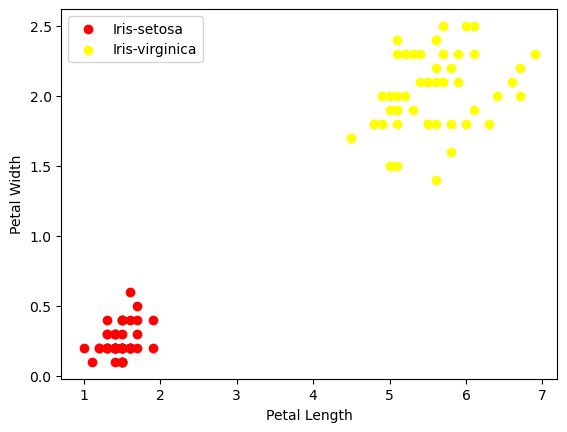

In [133]:
for i in range(2):
    # Select data for the current species.
    x = dataRemoveVersiColor[dataRemoveVersiColor['Species'] == species[i]]
    # Create a scatter plot with the specified color and label for the current species.
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c=colors[i], label=species[i])

# Add labels to the x and y axes.
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

# Add a legend to identify species based on colors.
plt.legend()

# Display the scatter plot.
plt.show()

In [134]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",dataRemoveVersiColor.shape[0])
print("Number of columns ( features or x) are: ",dataRemoveVersiColor.shape[1])
     

Number of rows are:  100
Number of columns ( features or x) are:  6


## Feature Engineering & Data Pre-processing

In [135]:
# Encode the categorical columns
# Create a LabelEncoder object
encoder = LabelEncoder()

# Encode the 'Species' column to convert the species names to numerical labels
dataRemoveVersiColor['Species'] = encoder.fit_transform(dataRemoveVersiColor['Species'])

# Check the unique values in the 'Species' column after encoding
unique_species = dataRemoveVersiColor['Species'].unique()

# Display the unique encoded values
print("Encoded Species Values:")
print(unique_species) # 'Iris-setosa' == 0, 'Iris-versicolor' == 1, 'Iris-virginica' == 2

Encoded Species Values:
[0 1]


/var/folders/67/dcw01yc17xn56jbz7w1y8ttr0000gn/T/ipykernel_8486/948686681.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRemoveVersiColor['Species'] = encoder.fit_transform(dataRemoveVersiColor['Species'])


### $ f(x) = a1x1 + a2x2 + ... + a6x6 $  --> $ f(x) = y $    => (o,1) => 'Iris-setosa', 'Iris-virginica'

In [136]:
# Defining the X and y
x=dataRemoveVersiColor.drop(columns=['Species'], axis=1)
y=dataRemoveVersiColor['Species']

In [137]:
x.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [138]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [139]:
x= x.drop(columns=["Id"] , axis=1)

In [140]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [141]:
model = LogisticRegression()

In [142]:
model.fit(x,y)

LogisticRegression()

In [143]:
model.coef_

array([[ 0.48782112, -0.33708671,  1.82851266,  0.83431531]])

In [144]:
model.intercept_

array([-8.80175891])

In [145]:
model.score(x,y)

1.0

### Make real format to show the evidence 

In [146]:

# Splitting the data to train and test
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3 , shuffle=True)

In [147]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
149,5.9,3.0,5.1,1.8
119,6.0,2.2,5.0,1.5
147,6.5,3.0,5.2,2.0
136,6.3,3.4,5.6,2.4
11,4.8,3.4,1.6,0.2


In [148]:
y_train.head()

149    1
119    1
147    1
136    1
11     0
Name: Species, dtype: int64

In [149]:
modelSpilt=LogisticRegression()
modelSpilt.fit(x_train, y_train)

LogisticRegression()

In [150]:
predict_test = modelSpilt.predict(x_test)

### Show score of model on train part

In [151]:
modelSpilt.score(x_train , y_train)

1.0

### Show score of model in test part

In [152]:
model.score(x_test , y_test)

1.0

In [153]:
p = modelSpilt.predict(x_test)

In [154]:
dataRemoveVersiColor.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [155]:
p

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1])

In [156]:
dataRemoveVersiColor[:1]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0


In [157]:
x_sample = dataRemoveVersiColor[:1].drop(["Id" , "Species"] , axis=1)

In [158]:
x_sample

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2


In [159]:
sample_predict = modelSpilt.predict(x_sample)

0

In [ ]:
### now check model how well work  

In [160]:
sample_predict[0]

0

In [162]:
encoder.inverse_transform(sample_predict)

array(['Iris-setosa'], dtype=object)